## Análisis de Sentimientos - Tweets Huawei

El presente trabajo tiene como objetivo analizar y clasificar los sentimientos en negativos y positivos de los tweets relacionados a Huawei, como parte de la coyuntura de guerra comercial entre Estados Unidos y China. 
Extraemos los tweets que contengan #huawei y los vamos guardando en un csv.

In [1]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import twitter
import csv

In [2]:
# TWITTER
consumerKey = "uzhTFeRq3ev0Hi7yKUZdQW5VD"
consumerSecret = "8L5TaR0Zp1Ia7LBzdcElc98nntsTlwrGTylNnxUdy7tcmjF8ru"
accesToken = "2382260569-sp0IyPH5SQ7pRUX8yfFsZzAuTAkJUvLCixtBEmT"
accesTokenSecret = "u2CdMzFg3z49DLcwlByEa6BSwtZyCpF8XmjzcF1yBtTVX"
auth = tweepy.OAuthHandler(consumer_key = consumerKey, consumer_secret = consumerSecret)
auth.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

Se crea la data de tweets y se guarda en un csv

In [3]:
#csvFile = open('tw_huawei.csv','a', encoding= 'utf-8')

#csvWriter = csv.writer(csvFile, delimiter=';')

#for tweet in tweepy.Cursor(api.search,q="#huawei",count=100, lang="en", since="2019-04-04").items():
    #print (tweet.created_at, tweet.user.location, tweet.text)
    #csvWriter.writerow([tweet.created_at, tweet.user.location, tweet.text.encode('utf-8')])

In [4]:
#tweet_text = pd.DataFrame(data=data, columns=['likes', 'date','location', 'tweet'])
tw = pd.read_csv('tw_huawei.csv', sep=';', header= None, encoding='iso-8859-1', names=['fecha', 'ubicación','tweet'])
#tw.to_excel('huawei2.xlsx')
tw


,fecha,ubicación,tweet
0,2019-06-03 23:07:17,"Centurion, South Africa",b'RT @Lebo_Molax: Good morning to all #Huawei ...
1,2019-06-03 23:02:23,"Girardota, Colombia",b'RT @Huawei_Europe: Building a Fully Connecte...
2,2019-06-03 22:59:27,"Paris, France",b'RT @HuaweiFacts: Content continent: #Huawei ...
3,2019-06-03 22:58:55,NaN,b'Interestesting how #Huawei\xe2\x80\x99s pres...
4,2019-06-03 22:58:55,Europe,b'RT @torypython: @KateHoeyMP @POTUS @USAmbUK ...
5,2019-06-03 22:58:23,"Washington, DC",b'RT @aj_beloff: Britain listens to the United...
6,2019-06-03 22:55:44,NaN,"b'RT @HuaweiFacts: Cool, calm and collected: #..."
7,2019-06-03 22:54:47,NaN,b'RT @HuaweiFacts: See the light! This image p...
8,2019-06-03 22:53:17,NaN,"b'#Huawei, Amazon Fire, Samsung: These are the..."
9,2019-06-03 22:52:40,NaN,"b""RT @Masonsm35878042: #IEEE #Huawei IEEE ban ..."


Realizamos una limpieza de los datos extrayendo las letras que no agregan valor o significados, pasando todo a minúscula, y extrayendo los stopwords

In [5]:
import re #regular expression
from textblob import TextBlob
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS


In [6]:
def process_tweet(tweet):
    return " ".join(re.sub("b'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", tweet.lower()).split())

In [7]:
tw['p_tweet'] = tw['tweet'].apply(process_tweet)
#tw.to_excel("tweets.xlsx")

In [8]:
tw.head()

,fecha,ubicación,tweet,p_tweet
0,2019-06-03 23:07:17,"Centurion, South Africa",b'RT @Lebo_Molax: Good morning to all #Huawei ...,b rt lebo molax good morning to all huawei use...
1,2019-06-03 23:02:23,"Girardota, Colombia",b'RT @Huawei_Europe: Building a Fully Connecte...,b rt huawei europe building a fully connected ...
2,2019-06-03 22:59:27,"Paris, France",b'RT @HuaweiFacts: Content continent: #Huawei ...,b rt huaweifacts content continent huawei sign...
3,2019-06-03 22:58:55,NaN,b'Interestesting how #Huawei\xe2\x80\x99s pres...,b interestesting how huawei xe2 x80 x99s press...
4,2019-06-03 22:58:55,Europe,b'RT @torypython: @KateHoeyMP @POTUS @USAmbUK ...,b rt torypython katehoeymp potus usambuk anna ...


In [9]:
from nltk.tokenize import word_tokenize
#Tokenizing the phrases
tw['Tokens'] = tw.apply(lambda row: word_tokenize(row['p_tweet']), axis=1)
tw['Tokens'].head()

0    [b, rt, lebo, molax, good, morning, to, all, h...
1    [b, rt, huawei, europe, building, a, fully, co...
2    [b, rt, huaweifacts, content, continent, huawe...
3    [b, interestesting, how, huawei, xe2, x80, x99...
4    [b, rt, torypython, katehoeymp, potus, usambuk...
Name: Tokens, dtype: object

In [10]:
#tweets = []
stopwords_set = set(stopwords.words("english"))
stopwords_set.add("to")
stopwords_set.add("https")
stopwords_set.add("i")
stopwords_set.add("t")
stopwords_set.add("out")
stopwords_set.add("co")
stopwords_set.add("b")
stopwords_set.add("rt")
stopwords_set.add("n")
stopwords_set.add("x80")
stopwords_set.add("xe2")
stopwords_set.add("xa6")
stopwords_set.add("x99s")
stopwords_set.add("nhttps")
stopwords_set.add("says")
stopwords_set.add("xf0")

tw['Tokens2'] = list(map(lambda line: list(filter(lambda word: word not in stopwords_set, line)), tw.Tokens))
tw=tw.drop(['tweet'], axis=1)
tw.head()

,fecha,ubicación,p_tweet,Tokens,Tokens2
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[b, rt, lebo, molax, good, morning, to, all, h...","[lebo, molax, good, morning, huawei, users, ka..."
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[b, rt, huawei, europe, building, a, fully, co...","[huawei, europe, building, fully, connected, i..."
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[b, rt, huaweifacts, content, continent, huawe...","[huaweifacts, content, continent, huawei, sign..."
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[b, interestesting, how, huawei, xe2, x80, x99...","[interestesting, huawei, press, release, ongoi..."
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[b, rt, torypython, katehoeymp, potus, usambuk...","[torypython, katehoeymp, potus, usambuk, anna,..."


In [11]:
#Se construye diccionario
word_list = []
for index,value in tw['Tokens2'].iteritems():
    word_list.extend(value)

vocab = set(word_list)

vocab_set = sorted(vocab)

#Frecuencia de palabras
vocab_freq = dict()

for value in vocab_set:
    vocab_freq[value]=0
    
for index,item in tw['Tokens2'].iteritems():
    for word in item:
        vocab_freq[word] = vocab_freq[word] + 1
        
tw=tw.drop(['Tokens'], axis=1)
vocab_freq

{'0': 21,
 '000': 81,
 '000s': 1,
 '00bmbytjcw': 1,
 '00hrzulckx': 1,
 '00qgdduhnf': 1,
 '00xbw8q2ko': 1,
 '01': 3,
 '01mjwstn8t': 1,
 '02': 1,
 '02062019': 1,
 '02jan2019': 1,
 '02w7brfij1': 1,
 '02zbklqrvp': 1,
 '03': 1,
 '038kk4khpb': 1,
 '03uxejdoor': 1,
 '04': 2,
 '05': 7,
 '06': 3,
 '06nt9tzvgi': 1,
 '06odacizzf': 1,
 '07ajglzjj3': 1,
 '07b2keuqmh': 1,
 '07osm80jx2': 1,
 '07zyvwp22q': 1,
 '08140000114': 3,
 '08170': 1,
 '08170000': 1,
 '08olewanw6': 1,
 '08phhlc58i': 1,
 '08x9vwmial': 1,
 '08ysxsbkxg': 1,
 '09': 1,
 '0adj4mrxgv': 1,
 '0akrlzok8j': 1,
 '0ameb3mha4': 1,
 '0ayi327k2v': 1,
 '0bgo0a320g': 1,
 '0bkuwi7tsb': 1,
 '0blppwduvt': 1,
 '0bztq5pot7': 4,
 '0cs7gqo0dz': 1,
 '0cxakqxrv6': 1,
 '0cyxu3kugo': 1,
 '0d8jkz2fiz': 1,
 '0dnq2920vp': 1,
 '0dpbqzz43o': 2,
 '0dsm3tz9ip': 1,
 '0dzt8lnepx': 1,
 '0e4buep2jl': 1,
 '0ebn3yjrqs': 1,
 '0eeyflqxoi': 1,
 '0ejlkg69p1': 7,
 '0ezdeupck9': 1,
 '0f5xi9ug7d': 7,
 '0g0ceigx2b': 1,
 '0gggihfkas': 1,
 '0guwdguab7': 1,
 '0gxju6fkuu': 1,
 '0hh

Imprimimos las palabras más frecuentes. Esto nos ayudó a quitar palabras como "htps" , 'i', 't', entre otros indicados en los stopwords.

In [12]:
import operator

print("Total number of unique words: " + str(len(vocab_set)))
sorted_vocab_freq = list(reversed(sorted(vocab_freq.items(), key=operator.itemgetter(1))))
print("Top 100 most frequently used words: " + str(sorted_vocab_freq[:100]))

Total number of unique words: 17755
Top 100 most frequently used words: [('huawei', 15239), ('china', 2475), ('us', 2425), ('5g', 1891), ('x9f', 1651), ('huaweifacts', 1542), ('u', 1519), ('ban', 1393), ('chinese', 1010), ('world', 983), ('mahathir', 897), ('malaysia', 851), ('trump', 802), ('tech', 799), ('europe', 768), ('uk', 744), ('ieee', 710), ('technology', 679), ('x87', 660), ('connected', 658), ('building', 648), ('new', 634), ('fully', 629), ('google', 613), ('intelligent', 608), ('je1nmlrpk8', 606), ('globaltimesnews', 596), ('trade', 564), ('like', 564), ('first', 544), ('x9d', 526), ('amp', 523), ('chinadaily', 512), ('using', 505), ('company', 496), ('apple', 488), ('scmpnews', 480), ('x99', 463), ('business', 460), ('companies', 457), ('network', 430), ('government', 423), ('cgtnofficial', 421), ('fedex', 419), ('sanctions', 418), ('xb8', 410), ('authpaper', 405), ('use', 404), ('security', 401), ('mohamad', 394), ('minister', 393), ('said', 383), ('war', 376), ('ren', 3

## APLICAMOS VADER

Aplicamos la puntuación de Vader con VaderSentiment

In [13]:
%time   #tiempo de calculo del score de Vader
i=0 #counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer() 
compval1 = [ ]  #empty list to hold our computed 'compound' VADER score
while (i<len(tw)):
    k = analyser.polarity_scores(tw.iloc[i]['p_tweet'])
    compval1.append(k['compound'])
    i = i+1
    
#conversion de los valores de los sentimientos a numpy
compval1 = np.array(compval1)
len(compval1)



Wall time: 0 ns


15800

In [14]:
tw['VADER score'] = compval1
tw.head()

,fecha,ubicación,p_tweet,Tokens2,VADER score
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[lebo, molax, good, morning, huawei, users, ka...",0.6705
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[huawei, europe, building, fully, connected, i...",0.5070
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[huaweifacts, content, continent, huawei, sign...",0.3182
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[interestesting, huawei, press, release, ongoi...",0.0000
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[torypython, katehoeymp, potus, usambuk, anna,...",-0.5267


Creamos las etiquetas neutrales, positivas y negativas según Vader Score

In [15]:
%time

#se define categorias
i = 0

predicted_value = [ ] #empty series to hold our predicted values

while(i<len(tw)):
    if ((tw.iloc[i]['VADER score'] >= 0.7)):
        predicted_value.append('positive')
        i = i+1
    elif ((tw.iloc[i]['VADER score'] > 0) & (tw.iloc[i]['VADER score'] < 0.7)):
        predicted_value.append('neutral')
        i = i+1
    elif ((tw.iloc[i]['VADER score'] <= 0)):
        predicted_value.append('negative')
        i = i+1

Wall time: 0 ns


In [16]:
tw['sentiment'] = predicted_value
tw.head()

,fecha,ubicación,p_tweet,Tokens2,VADER score,sentiment
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[lebo, molax, good, morning, huawei, users, ka...",0.6705,neutral
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[huawei, europe, building, fully, connected, i...",0.5070,neutral
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[huaweifacts, content, continent, huawei, sign...",0.3182,neutral
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[interestesting, huawei, press, release, ongoi...",0.0000,negative
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[torypython, katehoeymp, potus, usambuk, anna,...",-0.5267,negative


Observamos la distribución según dichas etiquetas.  

Hay 841 tweets positivos con VADER, el 5.32% del total.
Hay 9774 tweets negativos con VADER, el 61.86% del total.
Hay 5185 tweets neutral con VADER, el 32.82% del total.


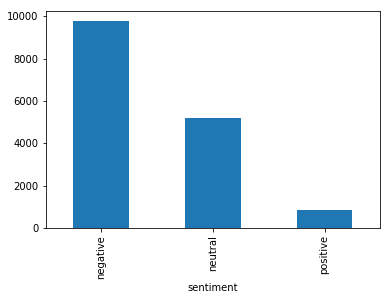

In [17]:
print("Hay",len(tw[tw['sentiment']=='positive']),\
      "tweets positivos con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='positive'])/len(tw)),"del total.")
print("Hay",len(tw[tw['sentiment']=='negative']),\
      "tweets negativos con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='negative'])/len(tw)),"del total.")
print("Hay",len(tw[tw['sentiment']=='neutral']),\
      "tweets neutral con VADER, el",\
      "{:.2%}".format(len(tw[tw['sentiment']=='neutral'])/len(tw)),"del total.")

tw.groupby('sentiment').size().plot(kind='bar')

In [18]:
tw

,fecha,ubicación,p_tweet,Tokens2,VADER score,sentiment
0,2019-06-03 23:07:17,"Centurion, South Africa",b rt lebo molax good morning to all huawei use...,"[lebo, molax, good, morning, huawei, users, ka...",0.6705,neutral
1,2019-06-03 23:02:23,"Girardota, Colombia",b rt huawei europe building a fully connected ...,"[huawei, europe, building, fully, connected, i...",0.5070,neutral
2,2019-06-03 22:59:27,"Paris, France",b rt huaweifacts content continent huawei sign...,"[huaweifacts, content, continent, huawei, sign...",0.3182,neutral
3,2019-06-03 22:58:55,NaN,b interestesting how huawei xe2 x80 x99s press...,"[interestesting, huawei, press, release, ongoi...",0.0000,negative
4,2019-06-03 22:58:55,Europe,b rt torypython katehoeymp potus usambuk anna ...,"[torypython, katehoeymp, potus, usambuk, anna,...",-0.5267,negative
5,2019-06-03 22:58:23,"Washington, DC",b rt aj beloff britain listens to the united s...,"[aj, beloff, britain, listens, united, states,...",0.4215,neutral
6,2019-06-03 22:55:44,NaN,b rt huaweifacts cool calm and collected huawe...,"[huaweifacts, cool, calm, collected, huawei, c...",-0.0772,negative
7,2019-06-03 22:54:47,NaN,b rt huaweifacts see the light this image puts...,"[huaweifacts, see, light, image, puts, perspec...",0.0000,negative
8,2019-06-03 22:53:17,NaN,b huawei amazon fire samsung these are the bes...,"[huawei, amazon, fire, samsung, best, android,...",0.5423,neutral
9,2019-06-03 22:52:40,NaN,b rt masonsm35878042 ieee huawei ieee ban huaw...,"[masonsm35878042, ieee, huawei, ieee, ban, hua...",-0.1779,negative


In [19]:
positive = tw[tw['sentiment']=='positive']
positive2=positive['Tokens2']


negative = tw[tw['sentiment']=='negative']
negative2=negative['Tokens2']

Positive words


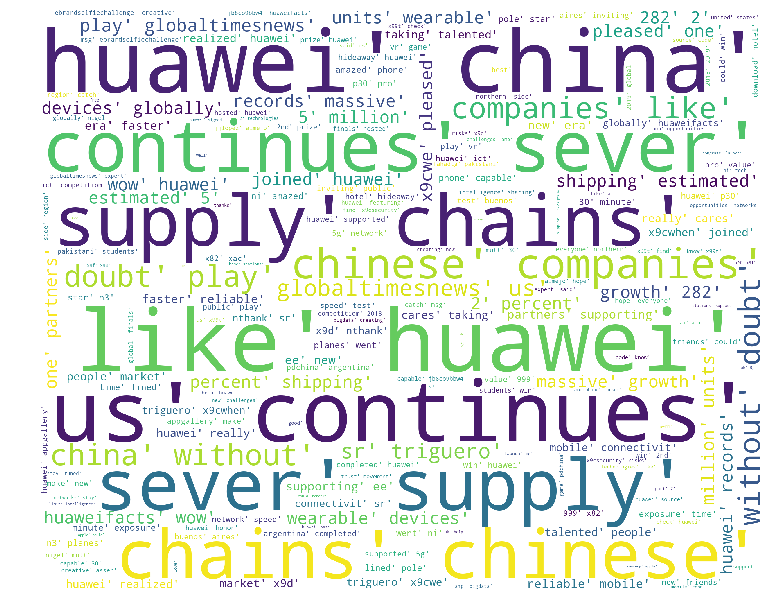

Negative words


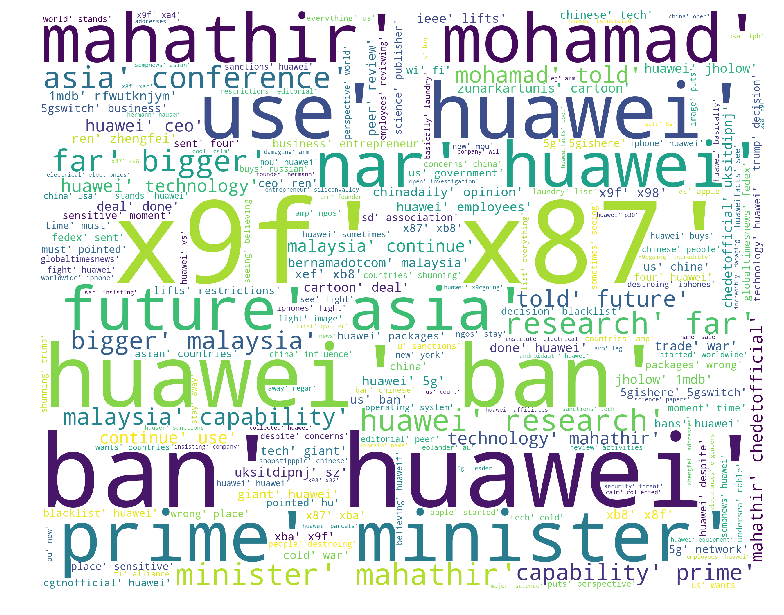

In [20]:
def wordcloud_draw(data, color = 'black'):
    words = ','.join(map(str, data))
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive2,'white')
print("Negative words")
wordcloud_draw(negative2,'white')

## APLICAMOS MODELO NAIVE BAYES CLASSIFIER


In [21]:
def create_sent_features(sentence):
    return {sentence: True}
#utiliza text porque usaba un diccionario {text:tweet}  

tw2=tw
tw = tw.filter(['p_tweet','sentiment'], axis=1)
tweet = tw.p_tweet
sentiment = tw.sentiment

# Se extrae features. 
featuresets = [(create_sent_features(tweet), sentiment) for index, (tweet, sentiment) in tw.iterrows()]

Separamos el dataset para entrenamiento y testeo. Tenemos el dataset compuesto por los tweets y la clasificación dada por ```VADER``` para cada uno de ellos.

In [22]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(featuresets,test_size = 0.2)
print(train_set,"\n                ==========================================\n",test_set)

[({'b rt hongkong bear today numerous angry hong kong users of huawei phone gathered at the service centre complaining their huawei suddenly xe2 x80 xa6': True}, 'negative'), ({'b rt guardiannigeria chinese telecom giant huawei steps up legal battle to overturn us legislation barring american federal agencies from xe2 x80 xa6': True}, 'negative'), ({'b rt cgtnofficial the u s bans huawei out of anti competitiveness concern chinaus https t co no8wmgnhef https t co xbfzuqobny': True}, 'negative'), ({'b rt globaltimesnews under the pressure of a us ban chinese 5g leader huawei is expected to further expand its business and make new brea xe2 x80 xa6': True}, 'negative'), ({'b rt 5gtechguides how 5gnetwork builders are competing with huawei in asia https t co hbq3da7g2v zdnet n 5g 5gishere 5gswitch busine xe2 x80 xa6': True}, 'negative'), ({'b rt sr triguero xe2 x80 x9cwhen i joined huawei i realized that huawei really cares about taking the most talented people from the market xe2 x80 x9d 

Aplicamos el modelo de predicción con el dataset de entrenamiento. Entrenamos el modelo con la clasificación que hace VADER

In [23]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

classifier = nltk.NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.accuracy(classifier, test_set) 

In [24]:
print("El % de efectividad de nuestro modelo es del","{:.2%}".format(nltk.classify.accuracy(classifier, test_set)))

El % de efectividad de nuestro modelo es del 86.87%


Aplicamos el modelo de predicción con el conjunto de test. Habiendo entrenado un modelo con el dataset __```train_set```__ haremos predicciones sobre los tweets de __```test_set```__. 

Almacenamos el resultado en el dataset __```test_predicted```__, que será una lista de tuplas compuesta por:
* Un diccionario con clave 'text' cuyo valor será el tweet original.
* La clasificación que ha hecho VADER del tweet.
* La clasificación que hemos predicho con el modelo entrenado.

In [25]:
test_predicted = []
for line in test_set:
    test_classificator = classifier.classify(line[0])
    test_predicted.append((line[0],line[1], test_classificator))
print("Ejemplo del contenido: \n",test_predicted[0])
print("======================================\n")
print(test_predicted)

Ejemplo del contenido: 
 ({'b i will add broly to the dbz folder xf0 x9f x94 xa5 n nhttps t co 2h8yxh1a7s n n handcrafted wallpaper iphone design iphonexsmax xe2 x80 xa6 https t co 56aemqhl2r': True}, 'negative', 'negative')

[({'b i will add broly to the dbz folder xf0 x9f x94 xa5 n nhttps t co 2h8yxh1a7s n n handcrafted wallpaper iphone design iphonexsmax xe2 x80 xa6 https t co 56aemqhl2r': True}, 'negative', 'negative'), ({'b rt bernamadotcom malaysia will continue to use huawei s technology mahathir chedetofficial n nhttps t co uksitdipnj https t co sz xe2 x80 xa6': True}, 'negative', 'negative'), ({'b rt mosameer huawei is helping sudan s coup junta establish the internet shutdown to suppress pro democracy revolts with support from z xe2 x80 xa6': True}, 'neutral', 'neutral'), ({'b huawei us blacklist will harm billions of consumers oh dear how sad never mind trust xf0 x9f x9a xab https t co aejsazxomh': True}, 'negative', 'negative'), ({'b u s s pompeo says huawei is an instrumen

Lo pasamos a Dataframe

In [26]:
tweet_frame = pd.DataFrame(test_predicted, columns=['text', 'VADER_sentiment','sentiment_predicted'])
#aqui completas con:
#for tweet in range(len(test_predicted)):
    #tweet_frame.loc[tweet]= [test_predicted[tweet][0]['text'], test_predicted[tweet][1], test_predicted[tweet][2]]
#utiliza text porque usaba un diccionario {text:tweet}  
tweet_frame.head(10)

,text,VADER_sentiment,sentiment_predicted
0,{'b i will add broly to the dbz folder xf0 x9f...,negative,negative
1,{'b rt bernamadotcom malaysia will continue to...,negative,negative
2,{'b rt mosameer huawei is helping sudan s coup...,neutral,neutral
3,{'b huawei us blacklist will harm billions of ...,negative,negative
4,{'b u s s pompeo says huawei is an instrument ...,negative,negative
5,{'note dubai xe2 x80 x99s partnership with hua...,negative,negative
6,{'b huawei china s state hackers are rigging 5...,negative,negative
7,{'b rt eolander after laying 50 361km of under...,negative,negative
8,{'b rt nar huawei s research is far bigger tha...,negative,negative
9,{'b rt huaweifacts rational fear huawei has ad...,neutral,neutral


## RESULTADOS Y COMPARATIVA


In [27]:
print("------------------------------Positivos--------------------------")
print("Hay",len(tweet_frame[tweet_frame['VADER_sentiment']=='positive']),\
      "tweets positivos con VADER, el",\
      "{:.2%}".format(len(tweet_frame[tweet_frame['VADER_sentiment']=='positive'])/len(tweet_frame)),"del total.")
print("Hay",len(tweet_frame[tweet_frame['sentiment_predicted']=='positive']),\
      "tweets positivos con el predictor, el",\
      "{:.2%}".format(len(tweet_frame[tweet_frame['sentiment_predicted']=='positive'])/len(tweet_frame)),"del total.")

print("------------------------------Negativos--------------------------")
print("Hay",len(tweet_frame[tweet_frame['VADER_sentiment']=='negative']),\
      "tweets negativos con VADER, el",\
      "{:.2%}".format(len(tweet_frame[tweet_frame['VADER_sentiment']=='negative'])/len(tweet_frame)),"del total.")
print("Hay",len(tweet_frame[tweet_frame['sentiment_predicted']=='negative']),\
      "tweets negativos con el predictor, el",\
      "{:.2%}".format(len(tweet_frame[tweet_frame['sentiment_predicted']=='negative'])/len(tweet_frame)),"del total.")

print("------------------------------Conclusión--------------------------")
print("De los",len(tweet_frame),\
      "tweets que forman el dataset 'test_set', hay diferencias en la clasificación que hace VADER \
      con la que predecimos en",len(tweet_frame[tweet_frame['VADER_sentiment']!=tweet_frame['sentiment_predicted']])\
      ,"de ellas.")

------------------------------Positivos--------------------------
Hay 145 tweets positivos con VADER, el 4.59% del total.
Hay 96 tweets positivos con el predictor, el 3.04% del total.
------------------------------Negativos--------------------------
Hay 1968 tweets negativos con VADER, el 62.28% del total.
Hay 2383 tweets negativos con el predictor, el 75.41% del total.
------------------------------Conclusión--------------------------
De los 3160 tweets que forman el dataset 'test_set', hay diferencias en la clasificación que hace VADER       con la que predecimos en 415 de ellas.
